In [1]:
import cv2
import datasets

import matplotlib.pyplot as plt
import numpy as np

/home/henning/repos/ai-playground/projects/label_pdf_documents/venv/lib/python3.11/site-packages/datasets/load.py:1486: FutureWarning: The repository for ds4sd/DocLayNet contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/ds4sd/DocLayNet
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


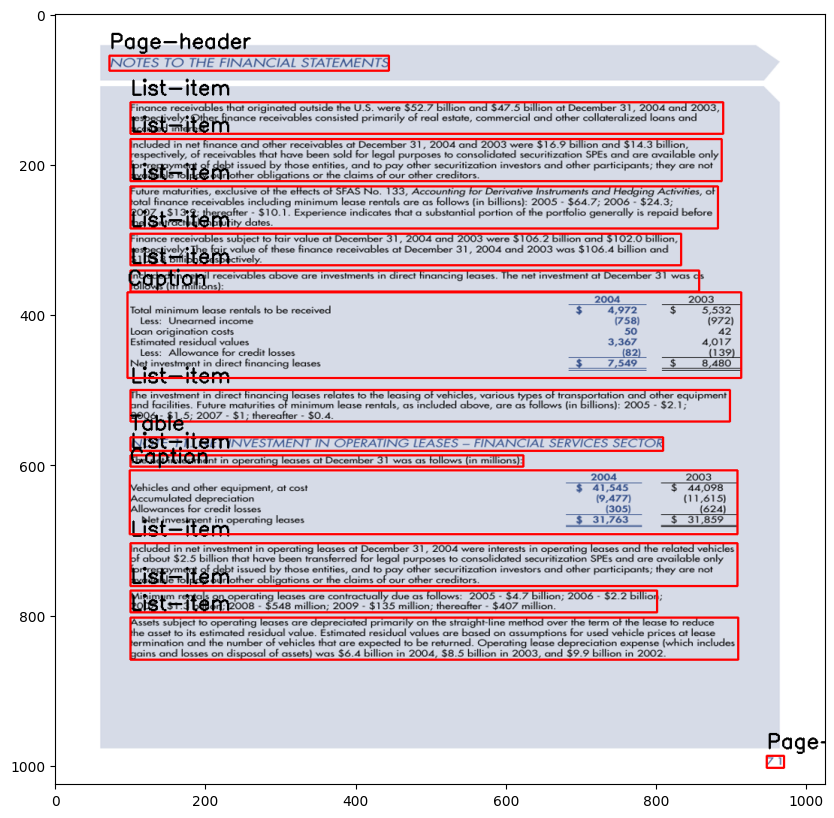

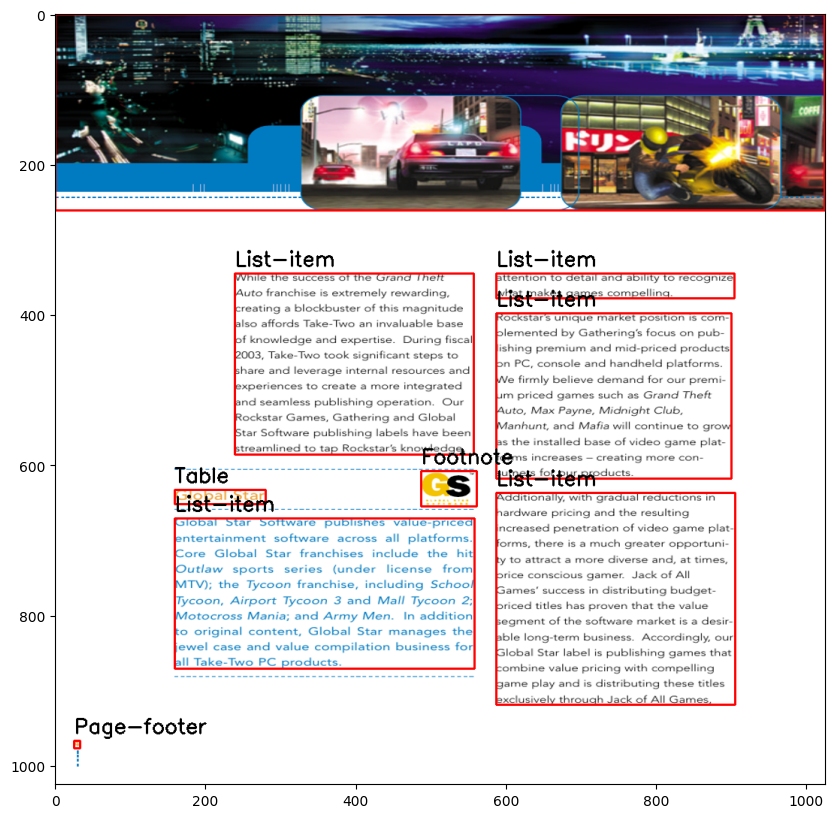

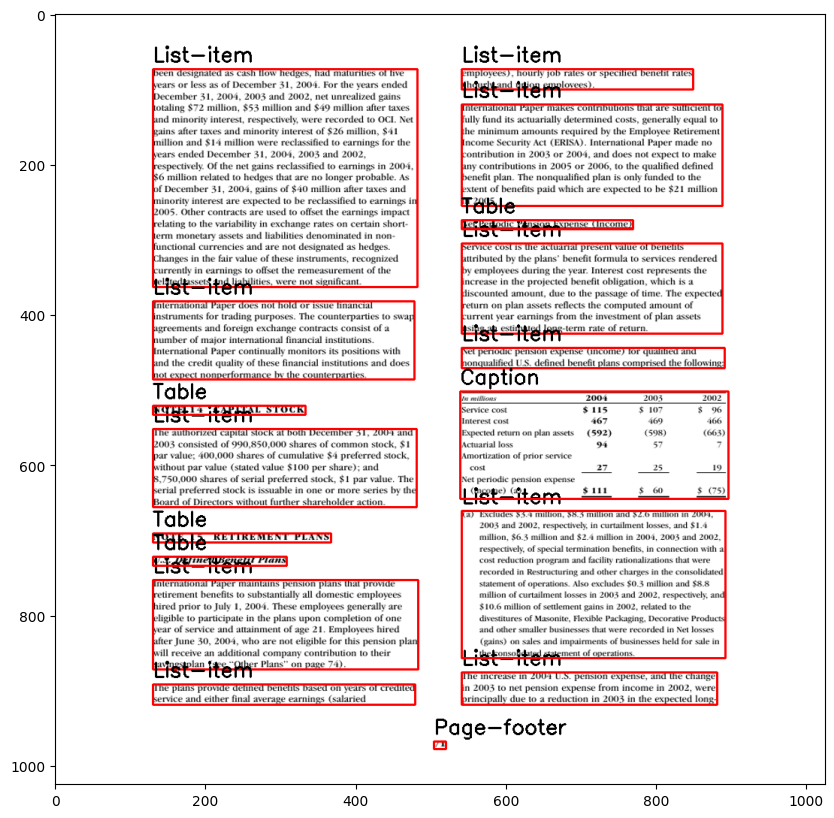

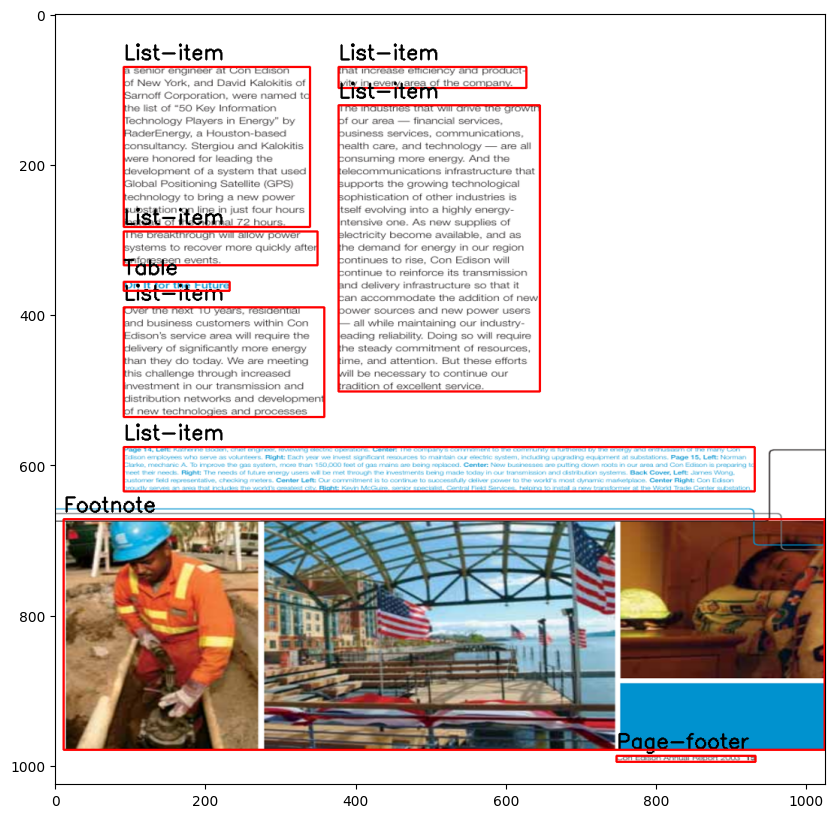

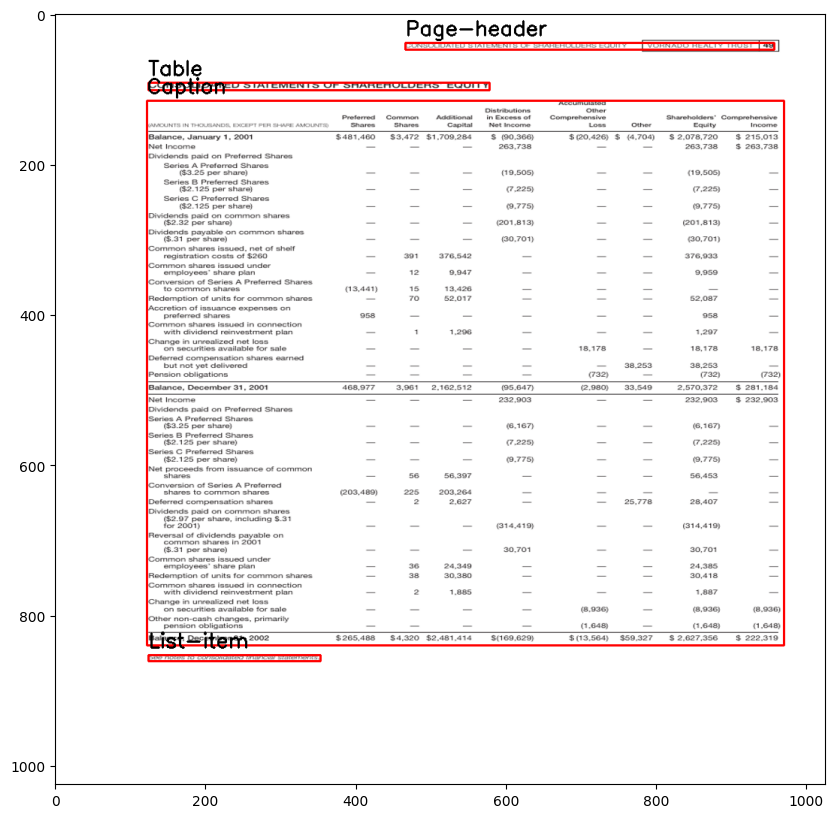

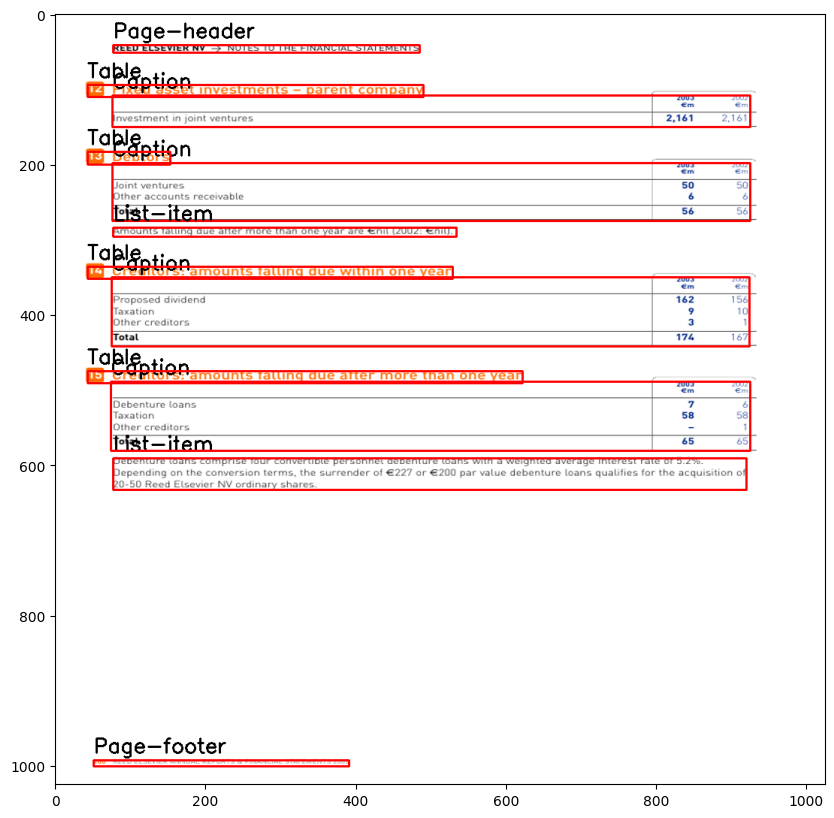

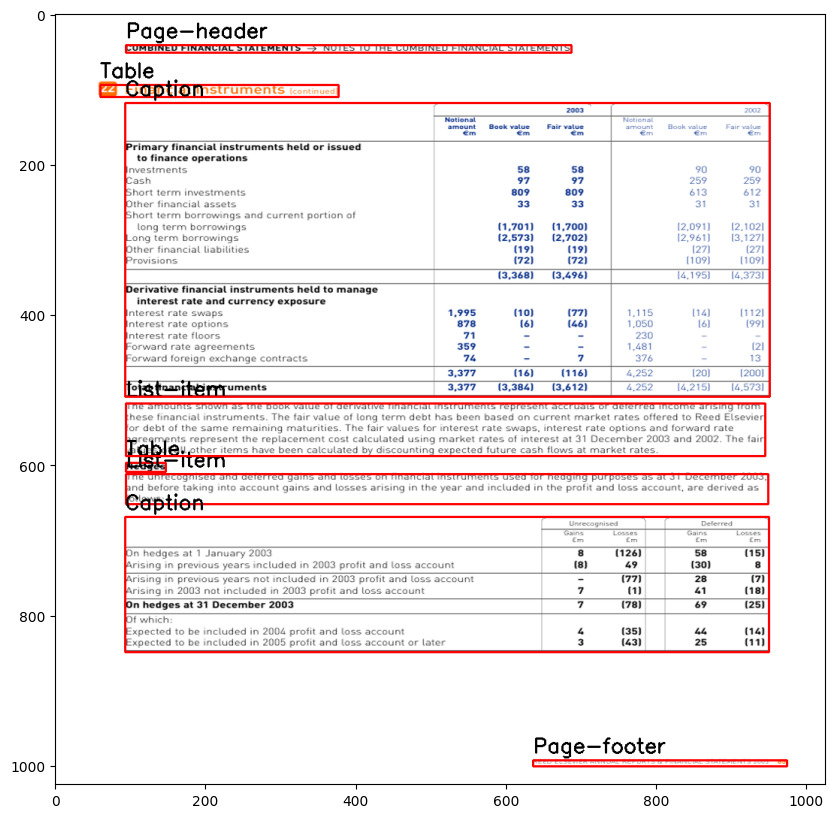

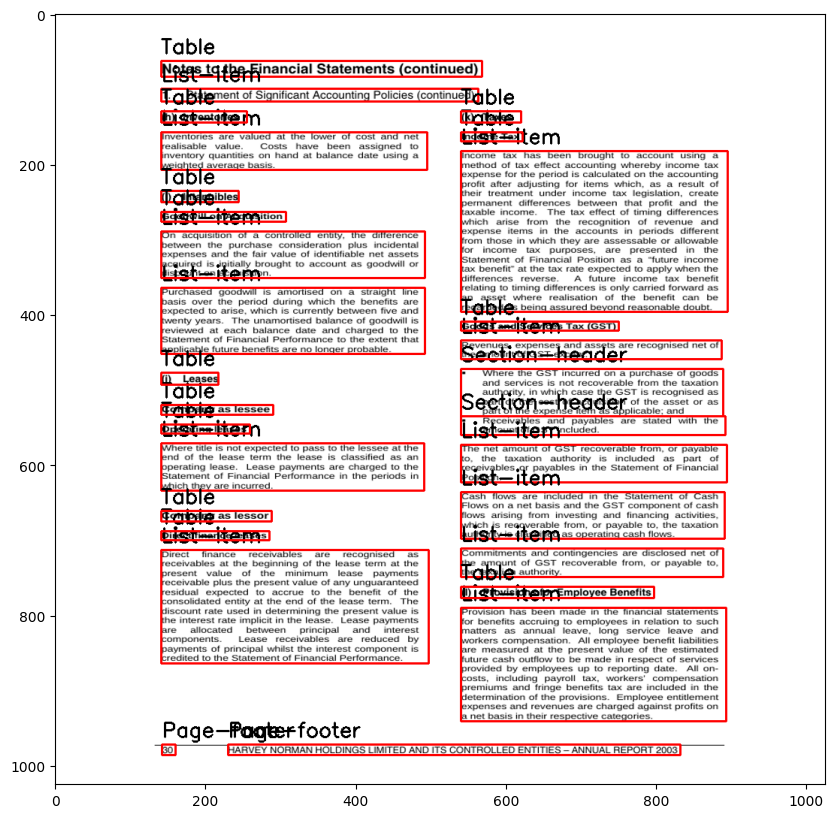

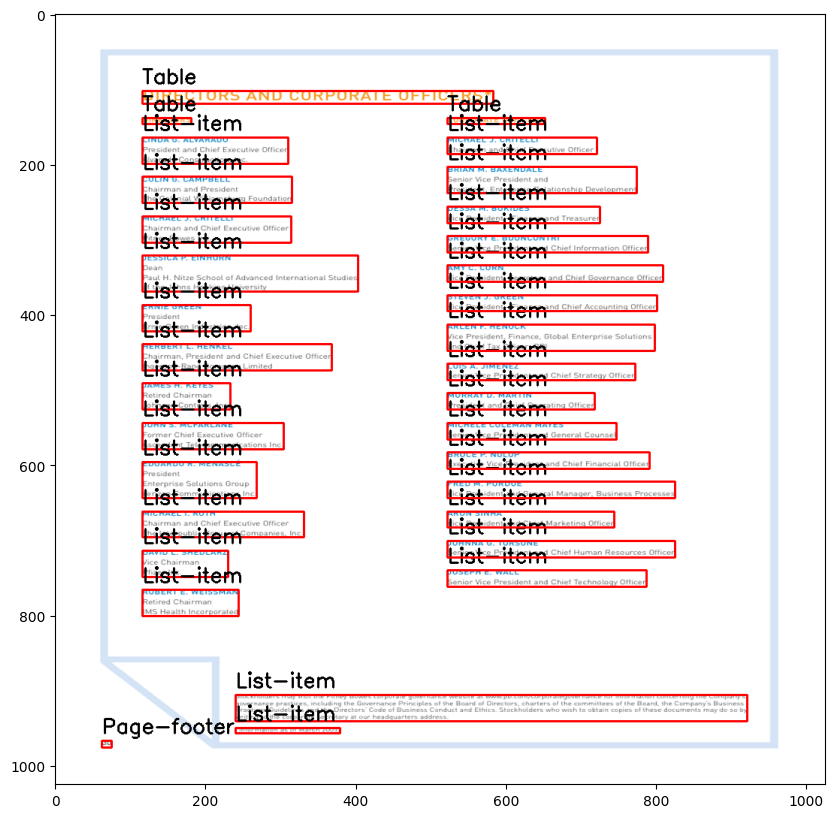

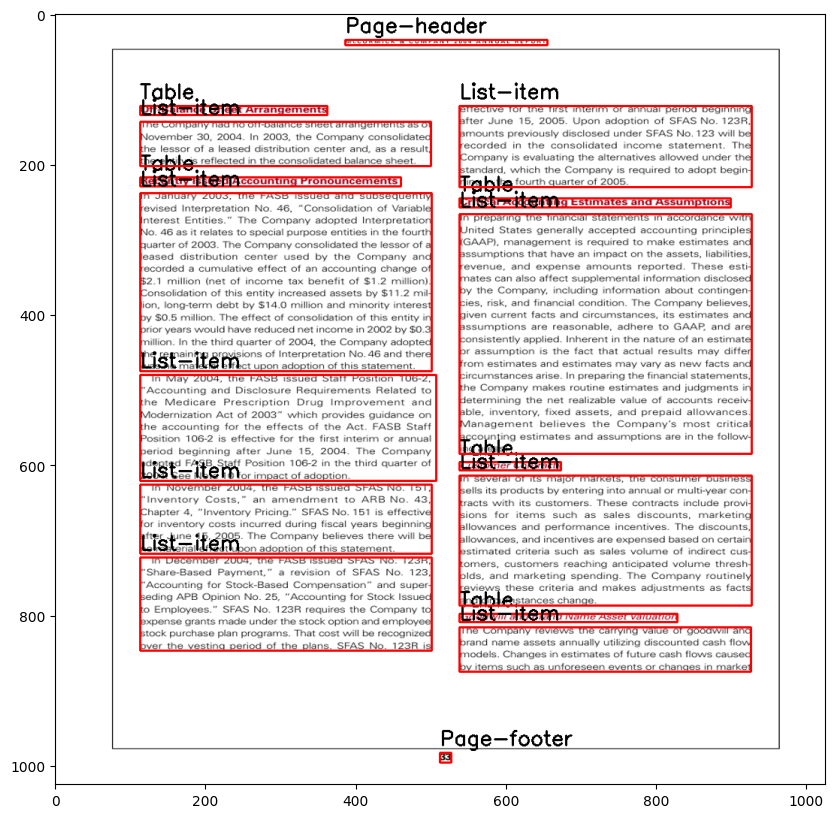

In [2]:
labels = dict()
labels[0] = ("Text", (255, 255, 0))
labels[1] = ("Picture", (255, 255, 128))
labels[2] = ("Formula", (153, 153, 153))
labels[3] = ("Section-header", (153, 0, 0))
labels[4] = ("Page-footer", (255, 255, 0))

labels[5] = ("Page-header", (0, 153, 153))
labels[6] = ("Footnote", (0, 102, 0))
labels[7] = ("Table", (255, 102, 0))
labels[8] = ("Caption", (255, 204, 102))
labels[9] = ("List-item", (0, 153, 255))

labels[10] = ("Title", (255, 51, 0))
labels[11] = ("Background", (0, 0, 0))

dataset = datasets.load_dataset("ds4sd/DocLayNet", split="train")

for img, elements in zip(dataset[:10]["image"], dataset[:10]["objects"]):
    img = np.asarray(img)
    fig, axes = plt.subplots(1, 1, figsize=(10, 10))
    for element in elements:
        label = element["category_id"]
        label, color = labels[label]
        xl, yl, width, height = element["bbox"]
        xu = xl + width
        yu = yl + height
        
        xl = int(xl)
        yl = int(yl)
        xu = int(xu)
        yu = int(yu)
        
        img = cv2.rectangle(img.copy(), (xl, yl), (xu, yu), (255, 0, 0), 2)
        cv2.putText(img, label, (xl, yl - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 0), 2)
    axes.imshow(img)
    plt.show()

In [ ]:
dataset_fg = datasets.load_dataset("skytnt/anime-segmentation", 'fg', split="train")
dataset_bg = datasets.load_dataset("skytnt/anime-segmentation", 'bg', split="train")

for _ in range(3):
    fg_idx = np.random.randint(len(dataset_fg))
    for _ in range(3):
        bg_idx = np.random.randint(len(dataset_bg))
        
        fg = dataset_fg[fg_idx]["image"]
        bg = dataset_bg[bg_idx]["image"]
        
        fg = np.asarray(fg)
        h_small, w_small, c = fg.shape
        
        bg = np.asarray(bg)
        h_big, w_big, c = bg.shape

        if h_big - h_small <= 0 or w_big - w_small <= 0:
            continue
        
        h_off = np.random.randint(0, h_big - h_small)
        w_off = np.random.randint(0, w_big - w_small)
        
        mask = fg[:, :, -1] == 255
        selection = fg[mask, :3]
        
        small_img = bg[h_off:h_off + h_small, w_off:w_off + w_small].copy()
        small_img[mask] = selection
        
        img = bg.copy()
        img[h_off:h_off + h_small, w_off:w_off + w_small] = small_img
        
        small_mask = np.zeros(small_img.shape[:2])
        small_mask[mask] = 1
        mask = np.zeros(img.shape[:2])
        mask[h_off:h_off + h_small, w_off:w_off + w_small] = small_mask
        
        fig, axes = plt.subplots(1, 2, figsize=(10, 10))
        axes[0].imshow(img)
        axes[1].imshow(mask)
        plt.show()

In [ ]:
dataset = datasets.load_dataset("mattmdjaga/human_parsing_dataset", split="train")

for img, mask in zip(dataset[:10]["image"], dataset[:10]["mask"]):
    img = np.asarray(img)
    mask = np.asarray(mask)
    fig, axes = plt.subplots(1, 2, figsize=(10, 10))
    axes[0].imshow(img)
    axes[1].imshow(mask)
    plt.show()